### title

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [9]:
os.listdir(r'C:\Users\fahmi\Documents\Portfolio\Large Files\Data_Fitbase')

['dailyActivity_merged.csv',
 'dailyCalories_merged.csv',
 'dailyIntensities_merged.csv',
 'dailySteps_merged.csv',
 'heartrate_seconds_merged.csv',
 'hourlyCalories_merged.csv',
 'hourlyIntensities_merged.csv',
 'hourlySteps_merged.csv',
 'minuteCaloriesNarrow_merged.csv',
 'minuteCaloriesWide_merged.csv',
 'minuteIntensitiesNarrow_merged.csv',
 'minuteIntensitiesWide_merged.csv',
 'minuteMETsNarrow_merged.csv',
 'minuteSleep_merged.csv',
 'minuteStepsNarrow_merged.csv',
 'minuteStepsWide_merged.csv',
 'sleepDay_merged.csv',
 'weightLogInfo_merged.csv']

In [10]:
original = pd.read_csv(r'C:\Users\fahmi\Documents\Portfolio\Large Files\Data_Fitbase/minuteSleep_merged.csv', 
                       parse_dates=['date'], infer_datetime_format=False)

In [82]:
df_sleep = original.copy().drop(columns='logId').rename(columns={'Id': 'id', 'date': 'date_time'})

In [83]:
def df_info(df: pd.DataFrame, name: str):
    '''Prints columns and shape of a dataframe'''
    print(f'{name}:\n\tColumns: {list(df.columns)}\n\tShape: {df.shape}')

In [84]:
df_info(df_sleep, 'df_sleep')

df_sleep:
	Columns: ['id', 'date_time', 'value']
	Shape: (188521, 3)


In [85]:
df_sleep.head(3)

,id,date_time,value
0,1503960366,2016-04-12 02:47:30,3
1,1503960366,2016-04-12 02:48:30,2
2,1503960366,2016-04-12 02:49:30,1


### Sleep Analysis

In [86]:
df_sleep['day_of_week'] = df_sleep['date_time'].dt.day_name()
df_sleep['date'] = df_sleep['date_time'].dt.date

In [87]:
df_sleep.head(3)

,id,date_time,value,day_of_week,date
0,1503960366,2016-04-12 02:47:30,3,Tuesday,2016-04-12
1,1503960366,2016-04-12 02:48:30,2,Tuesday,2016-04-12
2,1503960366,2016-04-12 02:49:30,1,Tuesday,2016-04-12


In [88]:
df_sleep['time_diff'] = df_sleep.groupby('id')['date_time'].diff()

In [89]:
df_sleep.head(5)

,id,date_time,value,day_of_week,date,time_diff
0,1503960366,2016-04-12 02:47:30,3,Tuesday,2016-04-12,NaT
1,1503960366,2016-04-12 02:48:30,2,Tuesday,2016-04-12,0 days 00:01:00
2,1503960366,2016-04-12 02:49:30,1,Tuesday,2016-04-12,0 days 00:01:00
3,1503960366,2016-04-12 02:50:30,1,Tuesday,2016-04-12,0 days 00:01:00
4,1503960366,2016-04-12 02:51:30,1,Tuesday,2016-04-12,0 days 00:01:00


In [90]:
df_sleep.time_diff.value_counts()

0 days 00:01:00    188061
0 days 18:36:00         3
0 days 14:37:00         3
0 days 16:24:00         3
0 days 16:01:00         3
                    ...  
0 days 00:32:30         1
1 days 05:20:00         1
0 days 07:04:00         1
0 days 05:21:30         1
0 days 15:16:30         1
Name: time_diff, Length: 376, dtype: int64

In [91]:
df_sleep = df_sleep[df_sleep.time_diff == np.timedelta64(1, 'm')]

In [92]:
df_info(df_sleep, 'df_sleep')

df_sleep:
	Columns: ['id', 'date_time', 'value', 'day_of_week', 'date', 'time_diff']
	Shape: (188061, 6)


In [93]:
print(f'IDs:\n{df_sleep.id.unique()}\nLength:{len(df_sleep.id.unique())}')

IDs:
[1503960366 1644430081 1844505072 1927972279 2026352035 2320127002
 2347167796 3977333714 4020332650 4319703577 4388161847 4445114986
 4558609924 4702921684 5553957443 5577150313 6117666160 6775888955
 6962181067 7007744171 7086361926 8053475328 8378563200 8792009665]
Length:24


In [94]:
def plot_sleep(df_sleep: pd.DataFrame, id: int):
    '''
    Plots sleep data for a given id by sleep_value
    
        Parameters:
            df_sleep (pd.DataFrame): Dataframe with sleep data to plot
            id (int):                ID of the user to be analyzed
    '''

    WEEK_ORDER= ['Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday', 'Sunday']
    SLEEP_TYPE = ['Asleep', 'Restless', 'Awake in Bed']

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 8))
    df_id = df_sleep.loc[df_sleep.id == id]
    
    for idx, ax in enumerate(axes):

        minutes = df_id.loc[df_id.value == idx + 1].groupby('day_of_week')['value'].sum()
        days = df_id.groupby('date').day_of_week.value_counts()

        days_count = {}
        for i in range(len(days)):
            days_count[days.index[i][1]] = days_count.get(days.index[i][1], 0) + 1

        for i in minutes.index:
            minutes[i] /= days_count[i]

        sns.barplot(
            orient='h', x=minutes.values, y=minutes.index, 
            palette='icefire', order=WEEK_ORDER, alpha=0.8, ax=ax
        )

        # if idx > 0:
        #     ax.set_yticks([])
        ax.yaxis.set_tick_params(length=0)
        ax.set_ylabel('')
        ax.tick_params(axis='both', labelsize=14)
        ax.set_xlabel(xlabel=f'Minutes {SLEEP_TYPE[idx]}', fontsize=14, labelpad=10)

        ax.set_title(f'Minutes {SLEEP_TYPE[idx]} by Day of Week',
                    fontsize=16, loc='left', pad=20)

        ax.grid(axis='x', linestyle='--', alpha=0.8)
        sns.despine()
    
    fig.suptitle('Minutes Spent in Each Sleep State by Day of the Week', 
                 fontsize=22, x=0.123, y=1.05, ha='left')

In [97]:
ids = df_sleep.id.unique()

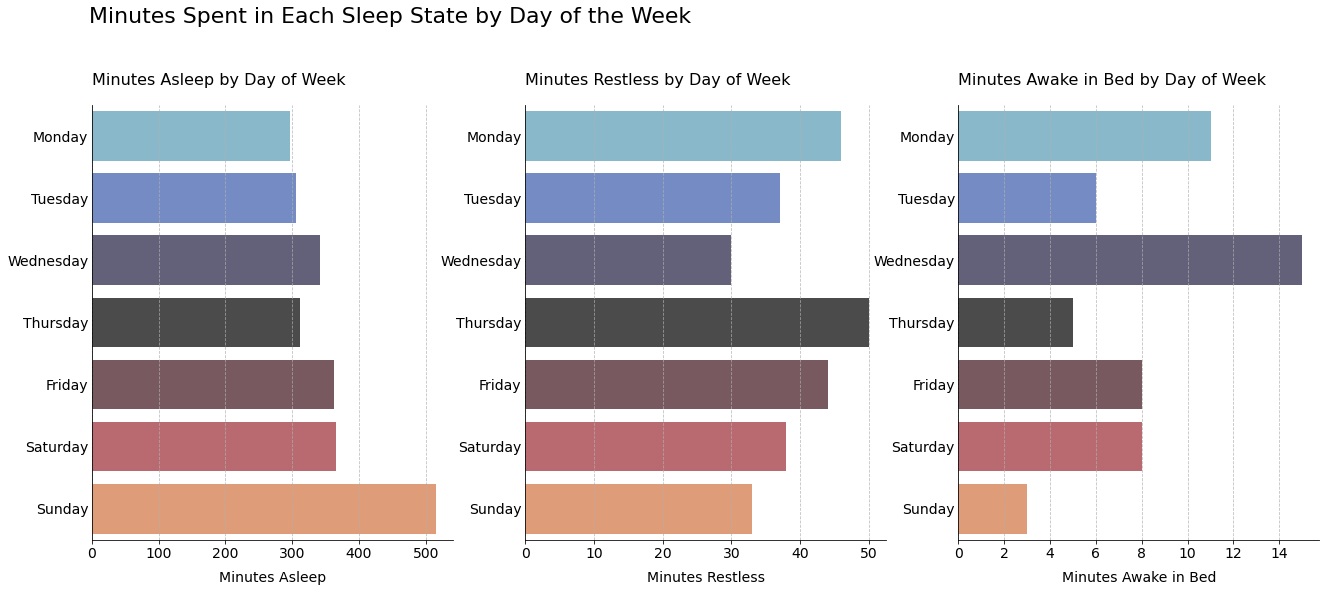

In [102]:
plot_sleep(df_sleep, id=ids[0])